In [1]:
from qiskit import* ## importing the library that necessary for quantum computing 
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector , plot_state_qsphere ## importing visualization tools for quantum computing 
from math import pi
from qiskit_aer import Aer
%matplotlib inline

In [28]:

# Initialize 3-qubit registers
q0 = QuantumRegister(1, name="q0")  # Olivia's source qubits to teleport to Barron
q1 = QuantumRegister(1, name="q1")  # Middle qubit sent to Olivia (half of the Bell state pair)
q2 = QuantumRegister(1, name="q2")  # Barron's destination qubits (half of the Bell state pair)

# Initialize classical registers
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

# Create the quantum circuit
circuit = QuantumCircuit(q0, q1, q2, crz, crx)

# Initialize Olivia's state qubits (quantum state to teleport)
circuit.x(0)
circuit.barrier()

# Create Bell state pair
circuit.h(q1)
circuit.cx(q1, q2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(q0, q1)
circuit.h(q0)
circuit.barrier()

# Measure q0 and q1
circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

# Barron transforms his qubits based on measurement results
circuit.x(q2).c_if(crx, 1)  # Apply X gate if cr_x is 1
circuit.z(q2).c_if(crz, 1)  # Apply Z gate if cr_z is 1

# Print the circuit
print(circuit)


       ┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░               
   q0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────────────
       └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
   q1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
             ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
   q2: ──────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
             ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                          ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                          0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════════════╩════╡ 0x1 ╞═══════
                                             0    └─────┘       


C:\Users\Manish\AppData\Local\Temp\ipykernel_23264\726019670.py:33: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circuit.x(q2).c_if(crx, 1)  # Apply X gate if cr_x is 1
C:\Users\Manish\AppData\Local\Temp\ipykernel_23264\726019670.py:34: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circuit.z(q2).c_if(crz, 1)  # Apply Z gate if cr_z is 1


In [38]:

# Simulate the circuit and get the statevector
simulator = Aer.get_backend("statevector_simulator")

# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the transpiled circuit on the simulator
sim_result = simulator.run(compiled_circuit).result()

# Extract the statevector
statevector = sim_result.get_statevector()

# Display the statevector in LaTeX format
array_to_latex(statevector, prefix="\\text{Statevector = }\n")




<IPython.core.display.Latex object>

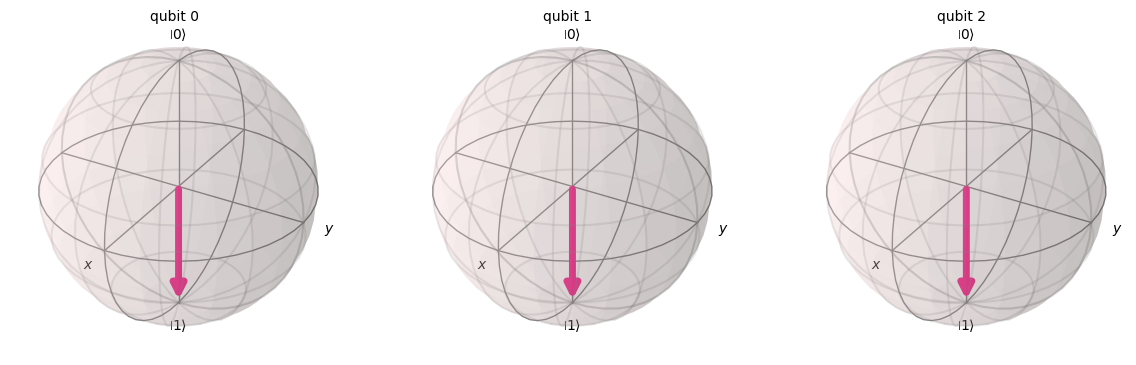

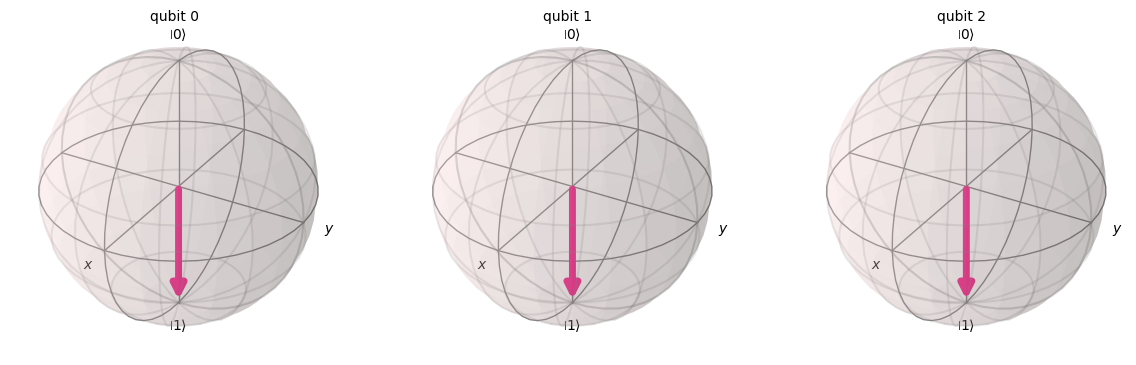

In [39]:
plot_bloch_multivector(statevector)

In [43]:
#adding final measurement of barron qubits

cr_result = ClassicalRegister(1, name="results")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
print(circuit)

           ┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░                ░     ░ »
       q0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░────────────────░─────░─»
           └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                ░     ░ »
       q1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░────────────────░─────░─»
                 ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐  ░ ┌─┐ ░ »
       q2: ──────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├──░─┤M├─░─»
                 ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘  ░ └╥┘ ░ »
                                              ║  ║       ║   ┌──╨──┐    ║    »
    crz: 1/═══════════════════════════════════╩══╬═══════╬═══╡ 0x1 ╞════╬════»
                                              0  ║    ┌──╨──┐└─────┘    ║    »
    crx: 1/══════════════════════════════════════╩════╡ 0x1 ╞═══════════╬════»
                                                 0    └─────┘           ║    »
 result: 1/═════════════════════════════════════════

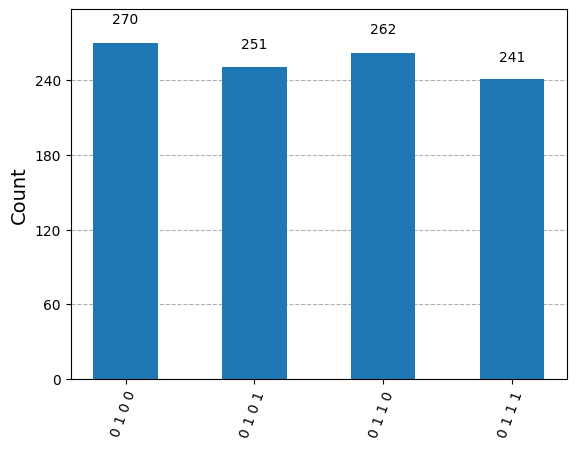

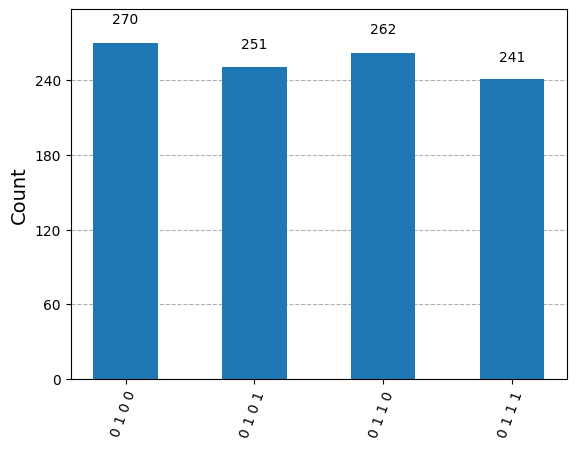

In [44]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()
plot_histogram(counts)